In [1]:
import scanpy as sc

import pandas as pd
import numpy as np

import tqdm

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.style as style
import matplotlib

import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

import scipy
from scipy.stats import spearmanr
from scipy.stats import zscore
from scipy.stats import pearsonr
from sklearn.metrics import pairwise_distances

# utils function -- helper functions for plotting
import sys
sys.path.append('../../utils/')
import figure_utils as figure_utils

In [2]:
# %matplotlib inline
# # # matplotlib.rcParams['figure.dpi'] = 500 # 150 dpi resolution
# # matplotlib.rcParams['figure.dpi'] = 2000 # 150 dpi resolution
# # matplotlib.rcParams['image.cmap'] = 'Spectral_r' # preferred color map
# # # matplotlib.rcParams['figure.figsize'] = [6, 6] # Square
# # set matplotlib style -- ggplot

# # set matplotlib style -- ggplot
# style.use('ggplot')

# # config for matplotlib
# matplotlib.rcParams['figure.figsize'] = [5,5]
# matplotlib.rcParams['figure.dpi'] = 2000
# matplotlib.rcParams['image.cmap'] = 'Spectral_r'

# # config for scanpy
# sc.settings.verbosity = 0
# sc.logging.print_header()
# sc.settings.set_figure_params(dpi=100, facecolor='white')


# # no bounding boxes or axis:
# matplotlib.rcParams['axes.spines.bottom'] = "off"
# matplotlib.rcParams['axes.spines.top'] = "off"
# matplotlib.rcParams['axes.spines.left'] = "off"
# matplotlib.rcParams['axes.spines.right'] = "off"

matplotlib.rcParams['figure.dpi'] = 500 # 150 dpi resolution
matplotlib.rcParams['image.cmap'] = 'Spectral_r' # preferred color map
# matplotlib.rcParams['figure.figsize'] = [6, 6] # Square
# no bounding boxes or axis:
matplotlib.rcParams['axes.spines.bottom'] = "off"
matplotlib.rcParams['axes.spines.top'] = "off"
matplotlib.rcParams['axes.spines.left'] = "off"
matplotlib.rcParams['axes.spines.right'] = "off"

%matplotlib inline

In [3]:
# UMAP PARAMS
DOT_SIZE = 25
LEGEND_FONTSIZE = 8
LEGEND_FONTOUTLINE = 1
UMAP_FIGSIZE = (10,10)

# SEXES COLOR
# HERM_COLOR = '#f58020'
# MALE_COLOR = '#1479b8'
# SHARED_SEX_COLOR = '#c2b69b'

# SEXES COLOR -- NEW
HERM_COLOR = '#ff8b00'
MALE_COLOR = '#2258a5'
SHARED_SEX_COLOR = '#349c55'

# AXIS TICK COLORS
AXIS_TICK_COLORS = 'black'

# lighter teal -- EQ
SHEATH_COLOR = '#3ac9c9' # '#369e9e'
SOCKET_COLOR = '#c47841'

# COMPARTMENTS COLOR -- Non-neural, Coelomocyte, Glia, Neuron
COMPARTMENTS_COLOR = ['#c63287','#ff99da','#693996','#fdcd0f']

In [4]:
# load data
adata = sc.read('../../data/WholeData.h5ad')
adata_glia = sc.read('../../data/GliaOnly.h5ad')

# Figure 4A -- Pan Glial Markers

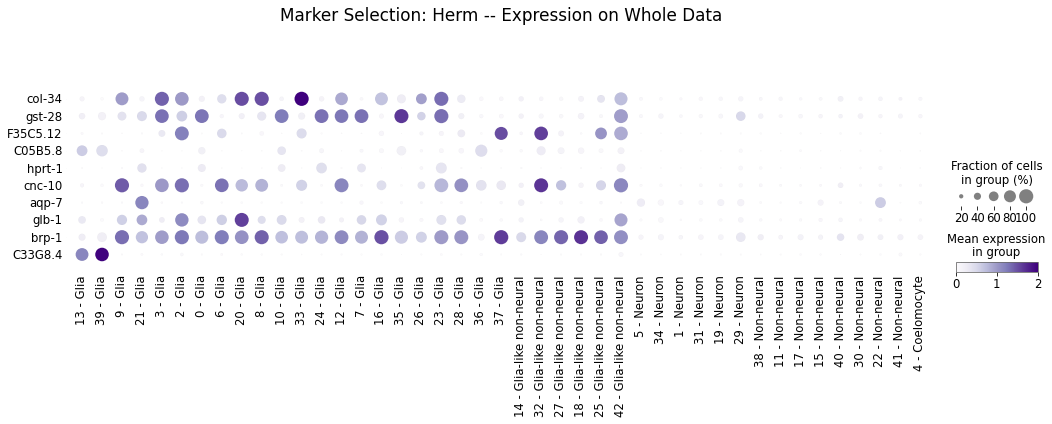

In [5]:
# the final results of our pan glia analysis
markers = adata.uns['FiguresData_PanGlial_Selection_Results']['Identified_Genes']

# ordering of the compartments
glia_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.endswith('Glia')
glia_cluster = pd.Series(adata.obs['cluster_comp'].unique())[glia_mask].values.tolist()

glia_like_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.contains('Glia-like')
glia_like_cluster = pd.Series(adata.obs['cluster_comp'].unique())[glia_like_mask].values.tolist()

neuron_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.contains('Neuron')
neuron_cluster = pd.Series(adata.obs['cluster_comp'].unique())[neuron_mask].values.tolist()

coelomocyte_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.contains('Coelomocyte')
coelomocyte_cluster = pd.Series(adata.obs['cluster_comp'].unique())[coelomocyte_mask].values.tolist()

anatomical_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.contains('Non-neural')
anatomical_cluster = pd.Series(adata.obs['cluster_comp'].unique())[anatomical_mask].values.tolist()

category_order = glia_cluster + glia_like_cluster + neuron_cluster + anatomical_cluster + coelomocyte_cluster

# visualize the markers using scanpy -- var_names takes in the 'markers' dictionary we've defined containing the genes we've identified
with matplotlib.pyplot.rc_context({'axes.edgecolor':'dimgray', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white','font.size':14}):
    all_data = sc.pl.dotplot(adata, var_names=markers, groupby='cluster_comp', use_raw=False, categories_order=category_order,\
                             dendrogram=False, swap_axes=True, title='Marker Selection: Herm -- Expression on Whole Data', vmax=2, return_fig=True, cmap='Purples')
    all_data.dot_edge_lw = 0.01
    
    # fix the aesthetics
    all_data.get_axes()['mainplot_ax'].axes.tick_params(axis='both', which='both',length=0.01)
    
    # color the texts based on whether the cluster belongs to Sheath or Socket Class
    # xticks = all_data.get_axes()['mainplot_ax'].axes.get_xticklabels()
    # for tick in xticks:
    #     if tick.get_text() in EXCLUDE_CLUSTERS:
    #        tick.set_color('red')
    #     else:
    #        tick.set_color('black')
    plt.savefig('figures/figure_4A_PanGlial_Markers.png', bbox_inches='tight')    

# Figure 4B -- Combinations

In [6]:
# get results
minimalset_results = adata.uns['FiguresData_PanGlial_Selection_Results']['Minimal_Set_Results'].copy()

# 6 gene combination
minimalset_results = minimalset_results.loc[minimalset_results['min_set_label'] == '6_genes',:]

# get combination -- combination_#7
minimal_combo = minimalset_results.loc[minimalset_results['combination'] == 'combination_#7','gene_combo'].unique().item()
minimal_combo

"('col-34', 'gst-28', 'F35C5.12', 'C05B5.8', 'cnc-10', 'glb-1')"

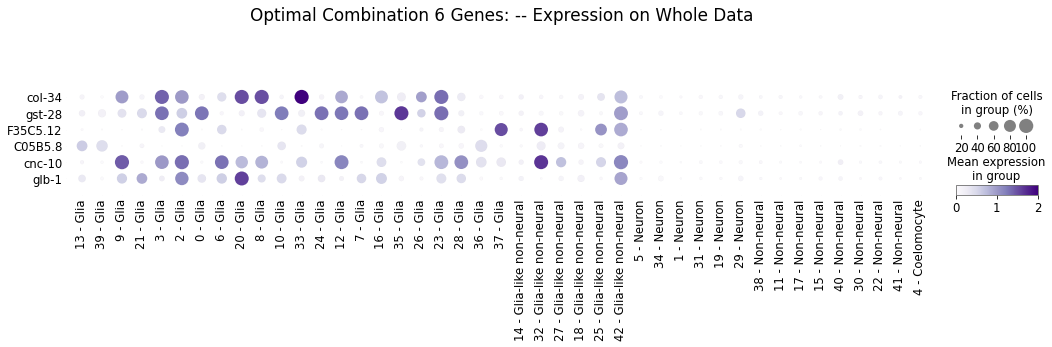

In [7]:
# the final results of our pan glia analysis
markers = minimal_combo.replace("(", "").replace(")", "").replace('\'',"").split(', ')

# ordering of the compartments
glia_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.endswith('Glia')
glia_cluster = pd.Series(adata.obs['cluster_comp'].unique())[glia_mask].values.tolist()

glia_like_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.contains('Glia-like')
glia_like_cluster = pd.Series(adata.obs['cluster_comp'].unique())[glia_like_mask].values.tolist()

neuron_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.contains('Neuron')
neuron_cluster = pd.Series(adata.obs['cluster_comp'].unique())[neuron_mask].values.tolist()

coelomocyte_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.contains('Coelomocyte')
coelomocyte_cluster = pd.Series(adata.obs['cluster_comp'].unique())[coelomocyte_mask].values.tolist()

anatomical_mask = pd.Series(adata.obs['cluster_comp'].unique()).str.contains('Non-neural')
anatomical_cluster = pd.Series(adata.obs['cluster_comp'].unique())[anatomical_mask].values.tolist()

category_order = glia_cluster + glia_like_cluster + neuron_cluster + anatomical_cluster + coelomocyte_cluster

# visualize the markers using scanpy -- var_names takes in the 'markers' dictionary we've defined containing the genes we've identified
with matplotlib.pyplot.rc_context({'axes.edgecolor':'dimgray', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white','font.size':14}):
    all_data = sc.pl.dotplot(adata, var_names=markers, groupby='cluster_comp', use_raw=False, categories_order=category_order,\
                             dendrogram=False, swap_axes=True, title='Optimal Combination 6 Genes: -- Expression on Whole Data', vmax=2, return_fig=True, cmap='Purples')
    all_data.dot_edge_lw = 0.01
    
    # fix the aesthetics
    all_data.get_axes()['mainplot_ax'].axes.tick_params(axis='both', which='both',length=0.01)
    
    # color the texts based on whether the cluster belongs to Sheath or Socket Class
    # xticks = all_data.get_axes()['mainplot_ax'].axes.get_xticklabels()
    # for tick in xticks:
    #     if tick.get_text() in EXCLUDE_CLUSTERS:
    #        tick.set_color('red')
    #     else:
    #        tick.set_color('black')
    plt.savefig('figures/figure_4B_PanGlial_Minimalset.png', bbox_inches='tight')    

# Figure 4C -- Transcription Factor Expression in Glia

In [8]:
gene_sets_tf = figure_utils.filter_gene_expression(ad_data=adata_glia, cluster_labels='Cluster_Celltype',
                                      target_genes='transcription_factors', percent_group_threshold=0.4)

Getting Fractions: 100%|██████████████████████████████████████████████████████████████| 640/640 [00:31<00:00, 20.13it/s]


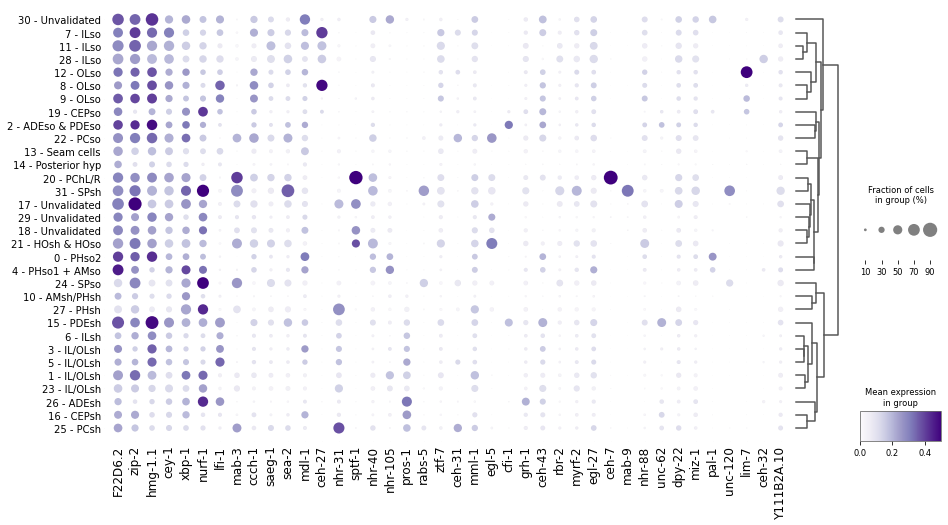

In [9]:
# transcription factor dotplots
with matplotlib.pyplot.rc_context({'axes.edgecolor':'dimgray', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    dotplot_tf = sc.pl.dotplot(adata_glia, var_names=gene_sets_tf, groupby='Cluster_Celltype', cmap='Purples', return_fig=True, dendrogram=True, figsize=(15,8), vmax=0.5)
    dotplot_tf.dot_edge_lw = 0.01
    
    # fix aesthetics
    dotplot_tf.get_axes()['mainplot_ax'].axes.tick_params(axis='both', which='both', length=0.01)
    
    # axis fonts/colors
    xticks = dotplot_tf.get_axes()['mainplot_ax'].axes.get_xticklabels()
    yticks = dotplot_tf.get_axes()['mainplot_ax'].axes.get_yticklabels()
    
    for tick in xticks:
        tick.set_fontsize(12)
        # tick.set_color
    
    for tick in yticks:
        tick.set_fontsize(10)
    
    plt.savefig('figures/figure_4C_TFdotplot.png', bbox_inches='tight')

# Figure 4D -- Trasnporters/Ion Channels in Glia

In [10]:
gene_sets_tp = figure_utils.filter_gene_expression(ad_data=adata_glia, cluster_labels='Cluster_Celltype',
                                      target_genes='transporters', percent_group_threshold=0.4)

Getting Fractions: 100%|██████████████████████████████████████████████████████████████| 719/719 [00:35<00:00, 20.04it/s]


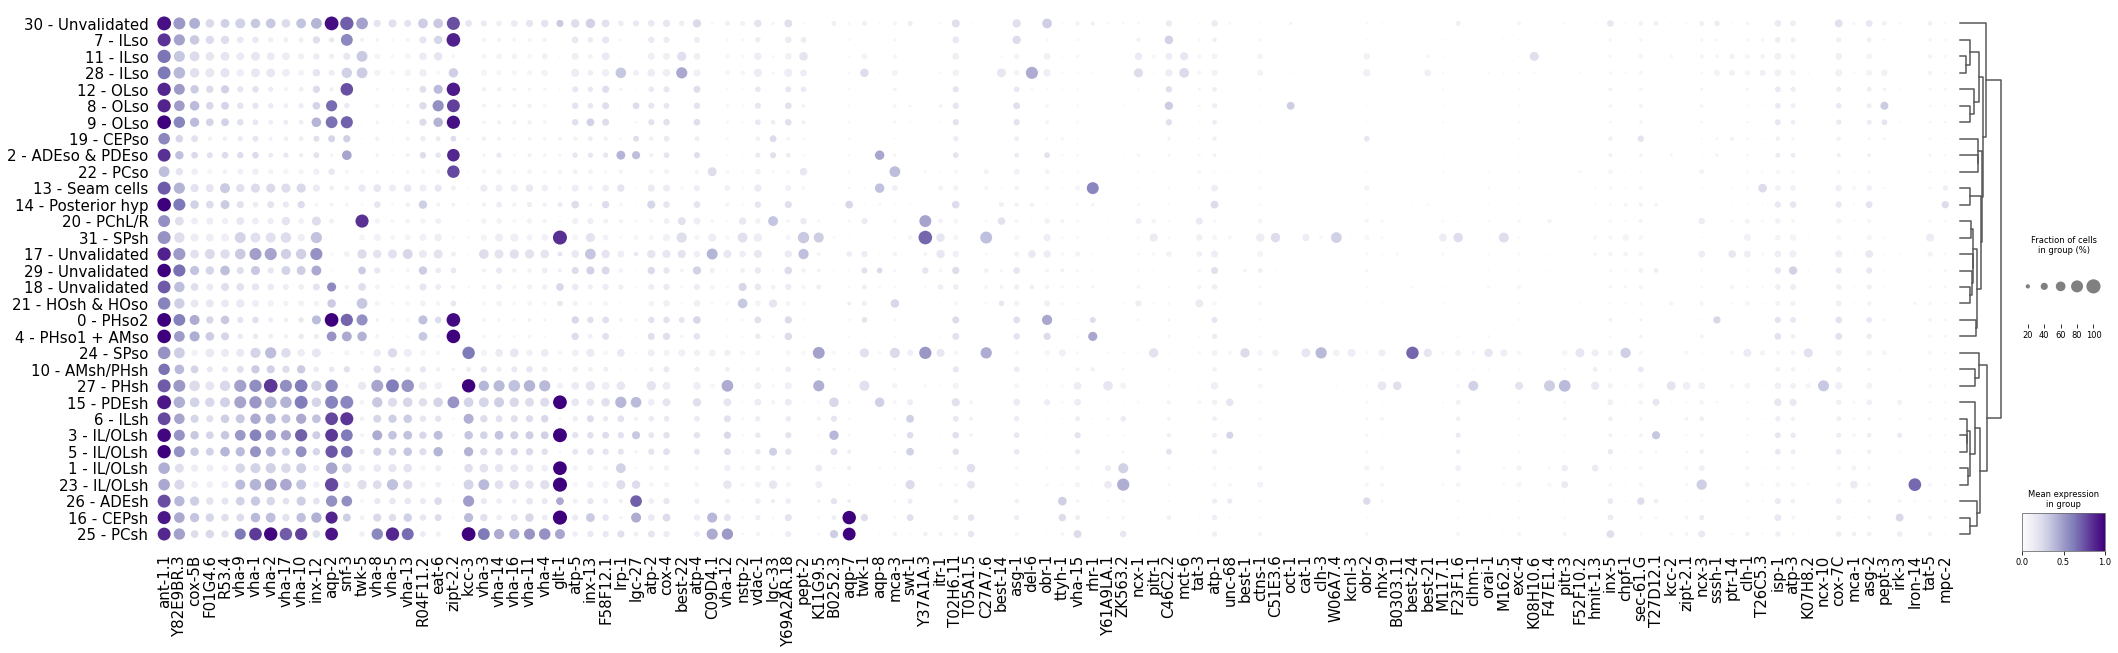

In [11]:
# transporter dotplots
with matplotlib.pyplot.rc_context({'axes.edgecolor':'dimgray', 'xtick.color':'black', 'ytick.color':'black', 'figure.facecolor':'white'}):
    dotplot_tf = sc.pl.dotplot(adata_glia, var_names=gene_sets_tp, groupby='Cluster_Celltype', cmap='Purples', return_fig=True, dendrogram=True, figsize=(35,10), vmax=1.0)
    dotplot_tf.dot_edge_lw = 0.01
    
    # fix aesthetics
    dotplot_tf.get_axes()['mainplot_ax'].axes.tick_params(axis='both', which='both', length=0.01)
    
    # axis fonts/colors
    xticks = dotplot_tf.get_axes()['mainplot_ax'].axes.get_xticklabels()
    yticks = dotplot_tf.get_axes()['mainplot_ax'].axes.get_yticklabels()
    
    for tick in xticks:
        tick.set_fontsize(15)
        # tick.set_color
    
    for tick in yticks:
        tick.set_fontsize(15)
    
    plt.savefig('figures/figure_4D_TPdotplot.png', bbox_inches='tight')

# Figure 4E -- <i>irk-3</i> Expression

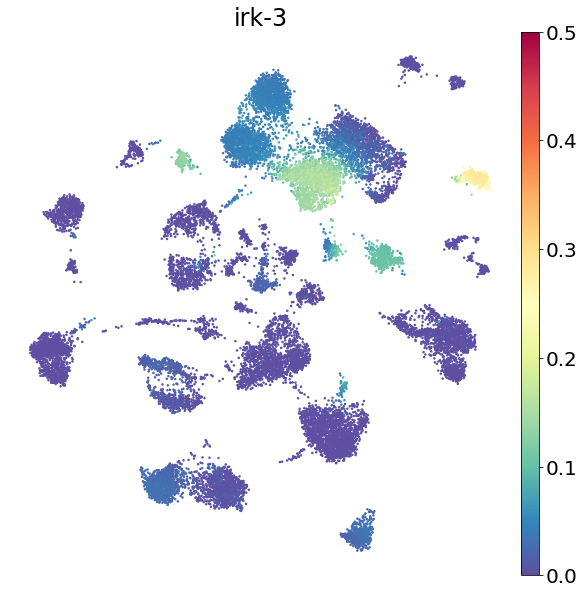

In [12]:
with matplotlib.pyplot.rc_context({'figure.figsize':UMAP_FIGSIZE, 'font.size': 20.0}):
    PLOT_GENES = ['irk-3'] 
    for gene in PLOT_GENES:
        sc.pl.umap(
            adata_glia,
            color=[gene],
            frameon=False,
            size=DOT_SIZE,
            save=f'figure_4E_{gene}.png',
            layer='magic_imputed_postBC',
            vmin=0,
            vmax=0.5
        )